In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import colors


In [24]:
iris = load_iris()
cols = [x.replace(" ", "_")[:-5] for x in iris.feature_names]

In [25]:
data = pd.DataFrame(iris.data, columns=cols)[['sepal_length', 'sepal_width']]
data_class = iris.target
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [26]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [27]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
lda = LinearDiscriminantAnalysis()

In [29]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [31]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

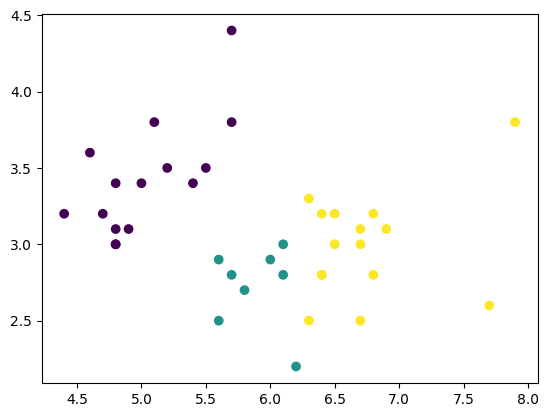

In [34]:
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=lda.predict(X_test))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


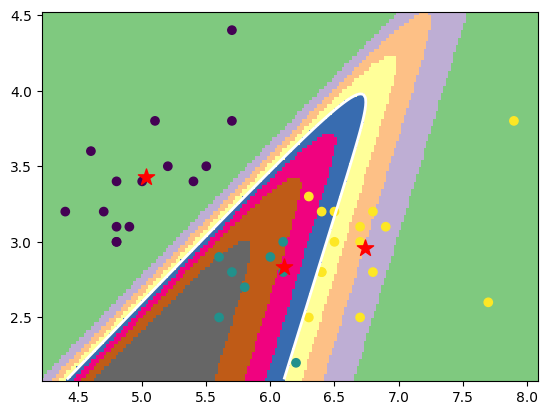

In [45]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_test, y_test)

# сам scatter plot
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='Accent',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [42]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [53]:
X_tr_sc = scaler.fit_transform(X_train)
X_tr_sc = scaler.transform(X_test)

In [54]:
from sklearn.cluster import KMeans

In [55]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_train)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 1], dtype=int32)

In [56]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_tr_sc)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

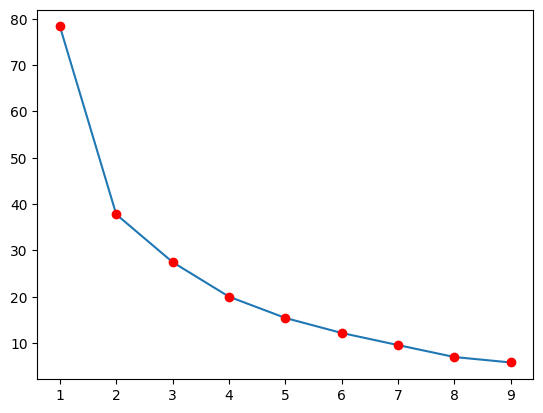

In [57]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [58]:
accuracy_score(y_test, kmeans.predict(X_test))

0.5526315789473685

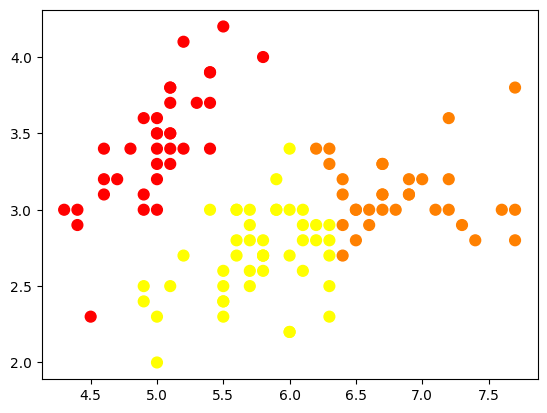

In [61]:
plt.scatter(x=X_train['sepal_length'], y=X_train['sepal_width'],cmap='autumn', c=clusters, s=60)